# Test on data that not in train or test set

In [6]:
IMG_PATH = '../data/raw/test/00a3edd22dc7859c487a64777fc8d093.jpg'
UNIQUE_LIST = '../models/unique_breeds.pkl'
MODEL_PATH = '../models/model.h5'

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import tensorflow_hub as hub
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [7]:
IMG_size = 224

def process_image(image_path):
    """
    Taking path of an image and turn it into tensor
    """
    
    # Read an image file
    image = tf.io.read_file(image_path)
    
    # Convert the image into tensor
    image = tf.image.decode_jpeg(image, channels=3)

    # Convert color channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image shape (244,244)
    image = tf.image.resize(image, size=[IMG_size, IMG_size])

    return image

In [8]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [29]:
# Define batch size
BATCH_SIZE = 32

# Create function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Split the data into batches
    """

    # If we have test dataset, we don't need labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(1)
        return data_batch

    # If we have valid data set, we need to shuffle the data
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
        tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print('Creating training data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
        tf.constant(y)))

        # Shuffling pathnames and labels before mapping
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

## Load the list of breeds and model

In [17]:
with open(UNIQUE_LIST, 'rb') as f:
   unique_list = pickle.load(f)

In [18]:
unique_list[:5]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier'], dtype=object)

In [22]:
model = tf.keras.models.load_model(MODEL_PATH,
                                     custom_objects={"KerasLayer":hub.KerasLayer})

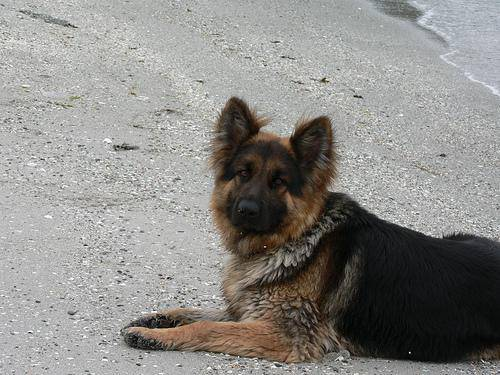

In [5]:
Image(IMG_PATH)

In [51]:
X = process_image(IMG_PATH)

In [63]:
X2 = tf.expand_dims(X, axis = 0)
X2.shape

TensorShape([1, 224, 224, 3])

In [65]:
y_pred = model.predict(X2)

In [66]:
unique_list[np.argmax(y_pred)]

'german_shepherd'